In [15]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [16]:
# Load YOLO model
net = cv2.dnn.readNet("/content/yolov3-tiny.weights", "/content/yolov3-tiny.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]


In [21]:
# Load the COCO class names
with open("/content/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Assign random colors to each class for bounding box display
colors = np.random.uniform(0, 255, size=(len(classes), 3))

# Load an image
frame = cv2.imread('/content/COCO_train2014_000000129565.jpg')  # Replace with the path to your image


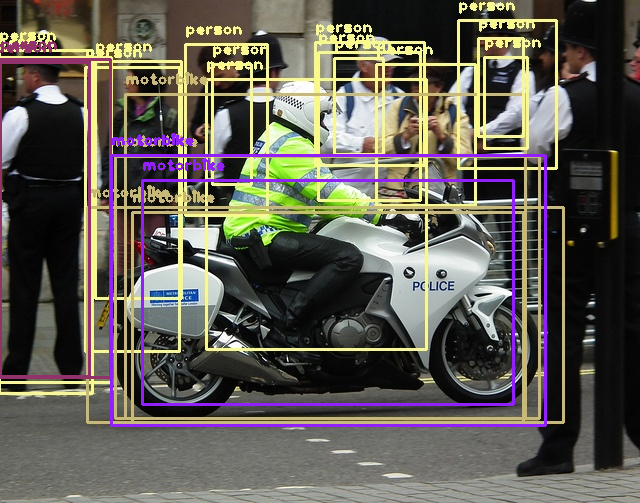

In [22]:
# Ensure the image was loaded successfully
if frame is None:
    print("Failed to load image.")
else:
    height, width, channels = frame.shape

    # Create a blob from the input image
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

    # Set the blob as input to the network
    net.setInput(blob)

    # Perform the forward pass and get the output layers
    outs = net.forward(output_layers)

    # Initialize lists for detected objects
    class_ids = []
    confidences = []
    boxes = []

    # Process the detection results
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.1:
                # Object detected
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)

                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)

                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Draw bounding boxes on the image
    for i in range(len(boxes)):
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[class_ids[i]]
        cv2.rectangle(frame, (x, y), (x + w, y + h), color, 2)
        cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_PLAIN, 1, color, 2)

    # Display the image with detections
    cv2_imshow(frame)

    # Optionally, save the image with detections
    cv2.imwrite('/content/COCO_train2014_000000129565.jpg', frame)
